In [7]:
import defs
# import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
# import matplotlib.colors as mcolors
from scipy import constants
# from openpmd_viewer import OpenPMDTimeSeries
# from openpmd_viewer.addons import LpaDiagnostics

# ffmpeg -framerate 30 -i uz_%04d.png pz.mp4

from mpl_toolkits.axes_grid1 import make_axes_locatable

import sys
sys.path.append('/Users/max/HiPACE/hipace/tools/')
import read_insitu_diagnostics as diag

plt.rc('text', usetex = True)
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = [10.0, 6.0]
plt.rcParams['font.size'] = 16
plt.style.use('classic')

step = True

# d = 'none'
# d = 'noneTest'
# d = 'noneStep'
# d = 'noneRBase'
# d = 'behindShort'
# d = 'behindLong' # doesn't really work!
# d = 'frontLong'
# d = 'frontShort'
# d = 'frontLongB'
# d = 'frontShortB'

# d = 'behindOffset/witness'
d = 'behindOffset/recovery'
# d = 'behindOffset/both'

# d = 'behindProp'

if 'none' in d:
    r = False
else:
    r = True

n = True

p = f'/Users/max/HiPACE/recovery/filament/h5/{d}/'
ip = f'/Users/max/HiPACE/recovery/filament/insitu/{d}/'

data = defs.Functions(path = p, insitu_path = ip, n0 = 1e17, iteration = 0, normalized = n, recovery = r)

IA = constants.m_e * constants.c**3 / constants.e

# data.customCMAP()

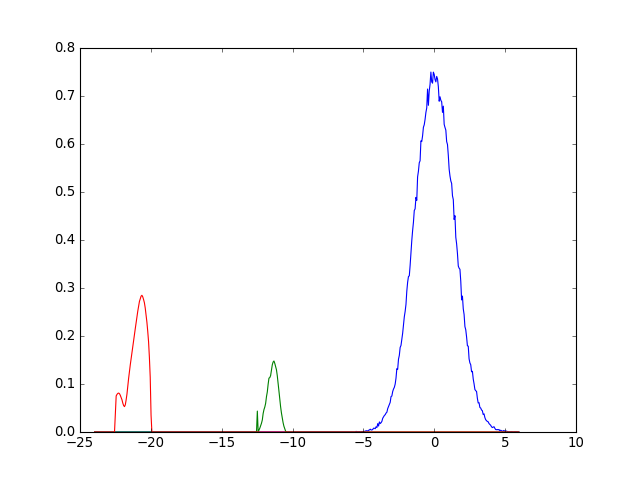

In [26]:
# diag.emittance_x(data.witnessInsitu['average']).shape
plt.figure()
plt.plot(data.info.z, abs(data.diag.per_slice_charge(data.driveInsitu)[0]))
plt.plot(data.info.z, abs(data.diag.per_slice_charge(data.witnessInsitu)[0]))
plt.plot(data.info.z, abs(data.diag.per_slice_charge(data.recoveryInsitu)[0]))
plt.show()

In [69]:
print(f'(Quick) Energy Transfer Efficiency : {data.quickEfficiency(iteration = data.iteration):.2f} %')

(Quick) Energy Transfer Efficiency : 12.73 %


In [23]:
print(f'Drive : {data.transverse_u_std_matched(data.driveInsitu, n, 0.05)}\nWitness: {data.transverse_u_std_matched(data.witnessInsitu, n, 0.029)}\nRecovery: {data.transverse_u_std_matched(data.recoveryInsitu, n, 0.05)}')

Drive : 3.5272224205885663
Witness: 0.9225952973492597
Recovery: 1.5868298729535852


In [24]:
print(data.charge(diag.total_charge(data.witnessInsitu))[0] * 1e12, data.charge(diag.total_charge(data.recoveryInsitu))[0] * 1e12)

64.28614302062297 -701.0642114260954


In [127]:
data.kp_inv * 1.41

2.3694540151264588e-05

In [93]:
1e4 * constants.m_e * constants.c / (1e9 * constants.e / constants.c)
2e3 * constants.m_e * constants.c / (1e9 * constants.e / constants.c)

1.0219978999923283

In [61]:
print(diag.position_std(data.recoveryInsitu, direction='x')[:, 10])

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.         14.40729634  7.14768496  6.80160137
  4.58734826  4.27280953  3.89879594  3.537129    3.24260721  3.09884756
  2.91716746  2.71689956  2.58000801  2.36736329  2.30867558  2.25790912
  2.26242085  2.16844147]


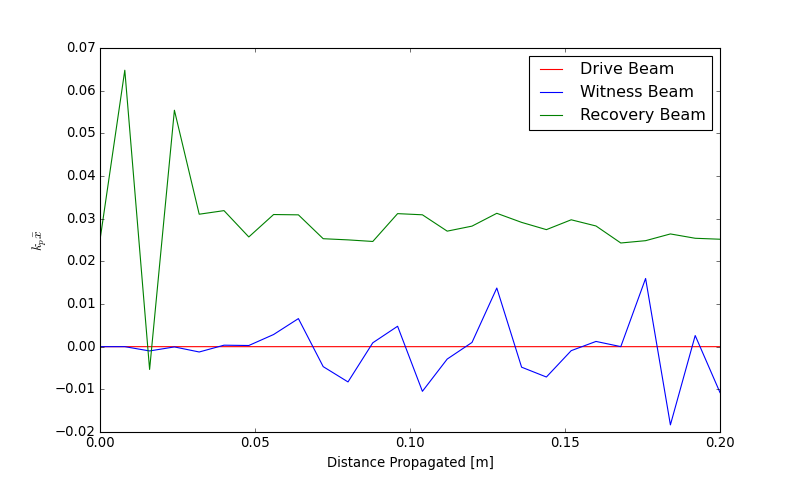

In [149]:
# print(data.witnessInsitu['average']['[x]'])
# print(data.witnessInsitu["time"])
# plt.rc('text', usetex = False)

plt.close()
plt.figure(figsize = (10, 6))
plt.plot(data.witnessInsitu["time"] * data.kp_inv, data.driveInsitu['average']['[x]'], label = 'Drive Beam', c = 'r')
plt.plot(data.witnessInsitu["time"] * data.kp_inv, data.witnessInsitu['average']['[x]'], label = 'Witness Beam', c = 'b')
plt.plot(data.witnessInsitu["time"] * data.kp_inv, data.recoveryInsitu['average']['[x]'], label = 'Recovery Beam', c = 'g')
plt.xlabel('Distance Propagated [m]')
plt.ylabel('$k_p\\bar{x}$')
plt.legend()
# plt.savefig('/Users/max/Downloads/test_frame.png', dpi = 500, bbox_inches = 'tight')
plt.show()

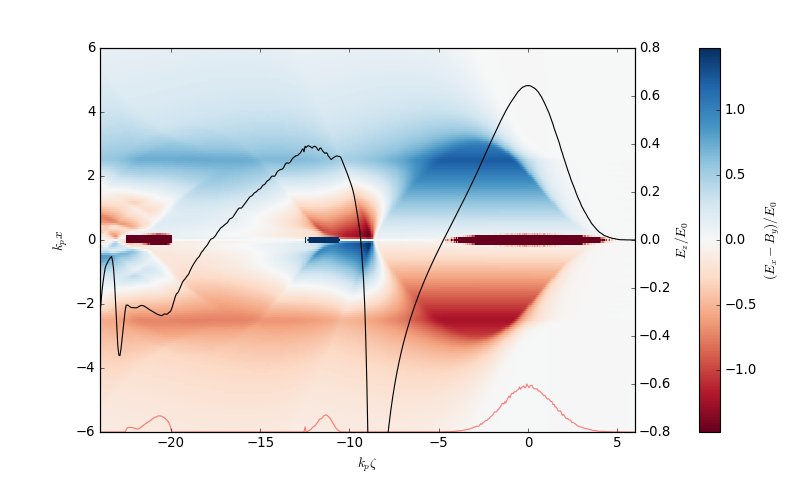

In [143]:
plt.close()
plt.figure(figsize = (10, 6))
ax = plt.axes()
im = plt.pcolormesh(data.info.z, data.info.x, data.ExmBy.T, cmap = 'RdBu') #, vmin = -1, vmax = 1)

# steps = 25
# prop_dist = 20 # cm
# plt.title(f'Propagated Distance: {data.iteration * prop_dist / steps:.2f} cm')

# plt.scatter(data.zd, data.xd, s = .02, color = 'darkred', label = '$e^-$ Drive Bunch')
# plt.scatter(data.zw, data.xw, s = .02, color = 'b', label = '$e^+$ Witness Bunch')
# plt.scatter(data.zr, data.xr, s = .02, color = 'g', label = '$e^-$ Recovery Bunch')

plt.pcolormesh(data.info.z, data.info.x, data.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15)
plt.plot(data.info.z, 1.5 * data.profile / max(data.profile) - 6, 'r', alpha = .5)


# plt.xlim(-34, 6)
plt.xlim(data.info.zmin, data.info.zmax)
# plt.ylim(data.info.xmin, data.info.xmax)
plt.ylim(-6, 6)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')
# plt.xticks(np.arange(round(data.info.zmin), round(data.info.zmax), 2))

ax2 = plt.twinx()
ax2.plot(data.info.z, data.Ez, color = 'black')
ax2.set_ylim(-.8, .8)
ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1) 

divider2 = make_axes_locatable(ax)
cax2 = divider2.append_axes("right", size = "4%", pad = .8)
divider3 = make_axes_locatable(ax2)
cax3 = divider3.append_axes("right", size = "4%", pad = .8)
cax3.remove()


cb2 = plt.colorbar(im, cax = cax2)
# cb2.formatter.set_useMathText(True)
# cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$(E_x - B_y)/E_0 $')

# plt.savefig('/Users/max/HiPACE/recovery/images/fNone.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [15]:
# ffmpeg -framerate 30 -i frames_%04d.png fbWOff.mp4

steps = 25
prop_dist = 20 # cm

# beam = 'W'
beam = 'R'
# beam = 'B'

for j in range(steps + 1):
    frameData = defs.Functions(path = p, insitu_path = ip, n0 = 1e17, iteration = j, normalized = n, recovery = r)
    
    plt.figure(figsize = (10, 6))
    ax = plt.axes()
    im = plt.pcolormesh(frameData.info.z, frameData.info.x, frameData.ExmBy.T, cmap = 'RdBu') #, vmin = -1, vmax = 1)
    plt.title(f'Propagated Distance: {j * prop_dist / steps:.2f} cm')

    plt.pcolormesh(frameData.info.z, frameData.info.x, frameData.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e15, vmax = 1e15)
    plt.plot(frameData.info.z, 1.5 * frameData.profile / max(frameData.profile) - 6, 'r', alpha = .5)

    plt.xlim(frameData.info.zmin, frameData.info.zmax)
    plt.ylim(-6, 6)
    plt.ylabel('$k_px$')
    plt.xlabel('$k_p\zeta$')

    ax2 = plt.twinx()
    ax2.plot(frameData.info.z, frameData.Ez, color = 'black')
    ax2.set_ylim(-.8, .8)
    ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1) 

    divider2 = make_axes_locatable(ax)
    cax2 = divider2.append_axes("right", size = "4%", pad = .8)
    divider3 = make_axes_locatable(ax2)
    cax3 = divider3.append_axes("right", size = "4%", pad = .8)
    cax3.remove()


    cb2 = plt.colorbar(im, cax = cax2)
    # cb2.formatter.set_useMathText(True)
    # cb2.formatter.set_powerlimits((0, 0))
    cb2.set_label(r'$(E_x - B_y)/E_0 $')

    plt.savefig(f'/Users/max/HiPACE/recovery/frames/fb{beam}Off/frame_{j:04}.png', dpi = 500, bbox_inches = 'tight')
    plt.close()

In [8]:
data.kp_inv * 2

3.3609276810304384e-05

In [28]:
print(data.charge(diag.total_charge(data.witnessInsitu)[0]) - data.charge(diag.total_charge(data.witnessInsitu)[-1]))
print(data.charge(diag.total_charge(data.witnessInsitu)))


1.136432586076299e-12
[1.83849799e-10 1.83849799e-10 1.83849799e-10 1.83849799e-10
 1.83849799e-10 1.83849799e-10 1.83849799e-10 1.83849799e-10
 1.83849799e-10 1.83849799e-10 1.83849799e-10 1.83849799e-10
 1.83849799e-10 1.83849799e-10 1.83849725e-10 1.83849651e-10
 1.83849640e-10 1.83848933e-10 1.83847618e-10 1.83845202e-10
 1.83836484e-10 1.83824823e-10 1.83791499e-10 1.83694706e-10
 1.83446511e-10 1.82713367e-10]


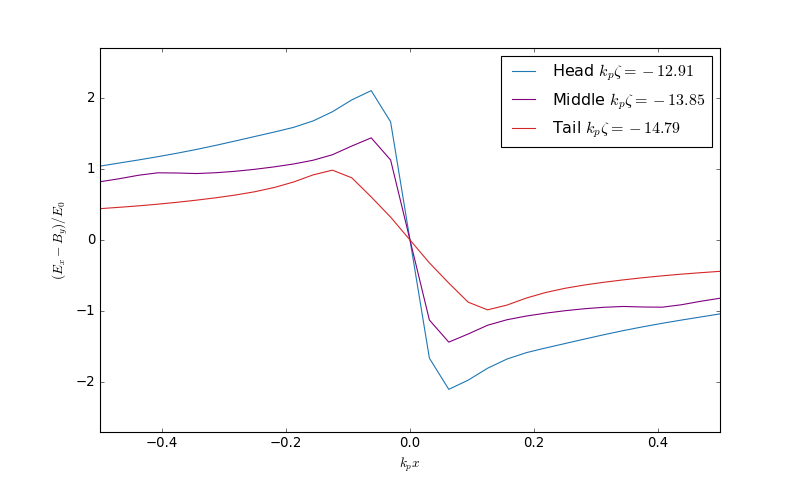

In [7]:
zAx = diag.z_axis(data.witnessInsitu)
beam = zAx[(data.witnessInsitu['sum(w)']!=0)[0]]
# print(zAx[612:734])
kpz = -15.65 # -14.14160156 # -15.125
choice = np.argmin(np.abs(zAx - kpz))
head = np.argmin(np.abs(zAx - max(beam)))
tail = np.argmin(np.abs(zAx - min(beam)))
mid = head - (head - tail)//2
# idx = np.argmin(np.abs(zAx-kpz))
# print(idx, zAx[idx])

# WFSlice = data.ts.get_field(field = 'ExmBy', iteration = data.iteration, slice_across = 'z', slice_relative_position = (kpz + abs(data.info.z[len(data.info.z)//2]))/((data.info.zmax - data.info.zmin)/2))[0]

plt.close()
plt.figure(figsize = (10, 6))
# plt.plot(data.info.x, WFSlice, 'k', linewidth = 2)
plt.plot(data.info.x, data.ExmBy[head], 'tab:blue', ls = '-', label = f'Head $k_p\zeta = {zAx[head]:.2f}$')
plt.plot(data.info.x, data.ExmBy[mid], 'purple', ls = '-', label = f'Middle $k_p\zeta = {zAx[mid]:.2f}$')
plt.plot(data.info.x, data.ExmBy[tail], 'tab:red', ls = '-', label = f'Tail $k_p\zeta = {zAx[tail]:.2f}$')
# plt.plot(data.info.x, data.ExmBy[choice], 'm', ls = '-', label = f'$k_p\zeta = {zAx[choice]:.2f}$')
plt.ylabel('$(E_x-B_y)/E_0$')
plt.xlabel('$k_px$')
# plt.title(f'$k_p\zeta = {kpz}$')
plt.ylim(-2.7, 2.7)
# plt.xlim(data.info.xmin, data.info.xmax)
plt.xlim(-.5, .5)
plt.legend(loc = 'best')
# plt.savefig('/Users/max/HiPACE/recovery/images/filamentFrontRecoTransverse.png', dpi = 300, bbox_inches = 'tight')
plt.show()

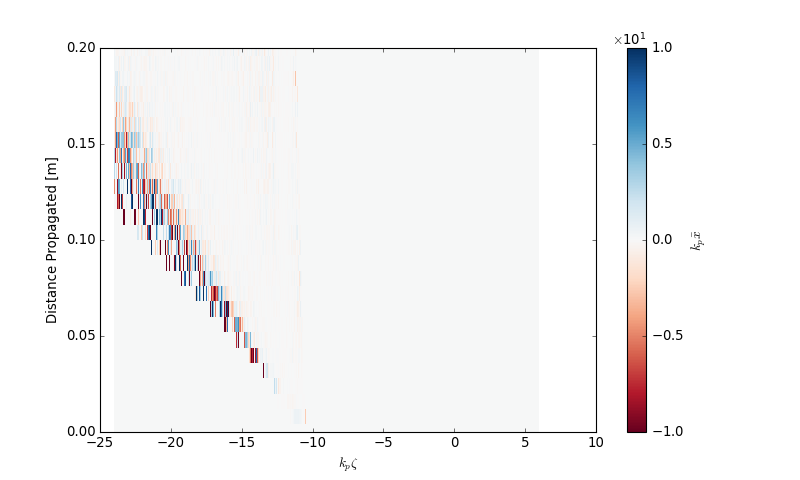

In [ ]:
zAx = diag.z_axis(data.witnessInsitu)
beam = zAx[(data.witnessInsitu['sum(w)']!=0)[-1]]

plt.close()
plt.figure(figsize=(10, 6))
img = plt.pcolormesh(diag.z_axis(data.witnessInsitu), data.witnessInsitu["time"] * data.kp_inv, data.witnessInsitu['[x]'], cmap='RdBu', vmin=-10, vmax=10)

plt.ylim(0, .2)
# plt.xlim(-24, -20)
# plt.xlim(min(beam), max(beam))
plt.ylabel('Distance Propagated [m]')
plt.xlabel('$k_p\zeta$')
cb2 = plt.colorbar(img)
cb2.formatter.set_useMathText(True)
cb2.formatter.set_powerlimits((0, 0))
cb2.set_label('$k_p\\bar{x}$')
plt.show()

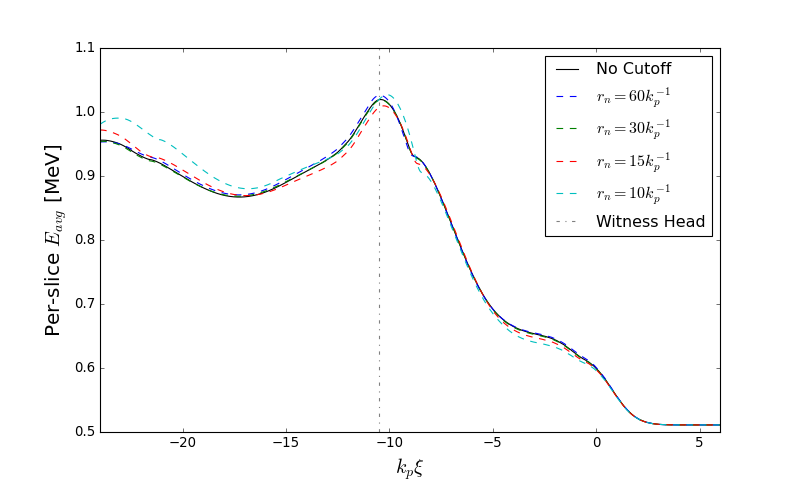

In [8]:
data.electronInsitu = diag.read_file(f'/Users/max/HiPACE/recovery/filament/insitu/{d}/reduced_electrons.0000.txt')
sixty = diag.read_file(f'/Users/max/HiPACE/recovery/filament/insitu/noneR/60.txt')
Nsixty = diag.read_file(f'/Users/max/HiPACE/recovery/filament/insitu/noneR/n60.txt')
thirty = diag.read_file(f'/Users/max/HiPACE/recovery/filament/insitu/noneR/30.txt')
Nthirty = diag.read_file(f'/Users/max/HiPACE/recovery/filament/insitu/noneR/n30.txt')
fifteen = diag.read_file(f'/Users/max/HiPACE/recovery/filament/insitu/noneR/15.txt')
Nfifteen = diag.read_file(f'/Users/max/HiPACE/recovery/filament/insitu/noneR/n15.txt')
ten = diag.read_file(f'/Users/max/HiPACE/recovery/filament/insitu/noneR/10.txt')
Nten = diag.read_file(f'/Users/max/HiPACE/recovery/filament/insitu/noneR/n10.txt')

plt.close()
plt.figure(figsize = (10, 6))
# for i in range(data.ts.iterations[-1]+1):
    # plt.plot(data.info.z, 1e-6 * diag.energy_mean_eV(data.electronInsitu, True)[i])

plt.plot(data.info.z, 1e-6 * diag.energy_mean_eV(data.electronInsitu, True)[0], 'k', label = 'No Cutoff')
# plt.plot(np.linspace(-24, data.info.zmax, 1024), 1e-6 * diag.energy_mean_eV(sixty, True)[0], '--', label = '$r=60k_p^{-1}$')
# plt.plot(np.linspace(-24, data.info.zmax, 1024), 1e-6 * diag.energy_mean_eV(thirty, True)[0], '--', label = '$r=30k_p^{-1}$')
# plt.plot(np.linspace(-24, data.info.zmax, 1024), 1e-6 * diag.energy_mean_eV(fifteen, True)[0], '--', label = '$r=15k_p^{-1}$')
# plt.plot(np.linspace(-24, data.info.zmax, 1024), 1e-6 * diag.energy_mean_eV(ten, True)[0], '--', label = '$r=10k_p^{-1}$')

plt.plot(np.linspace(-24, data.info.zmax, 1024), 1e-6 * diag.energy_mean_eV(Nsixty, True)[0], '--', label = '$r_n=60k_p^{-1}$')
plt.plot(np.linspace(-24, data.info.zmax, 1024), 1e-6 * diag.energy_mean_eV(Nthirty, True)[0], '--', label = '$r_n=30k_p^{-1}$')
plt.plot(np.linspace(-24, data.info.zmax, 1024), 1e-6 * diag.energy_mean_eV(Nfifteen, True)[0], '--', label = '$r_n=15k_p^{-1}$')
plt.plot(np.linspace(-24, data.info.zmax, 1024), 1e-6 * diag.energy_mean_eV(Nten, True)[0], '--', label = '$r_n=10k_p^{-1}$')

# plt.plot(data.info.z, diag.temperature_in_eV(data.electronInsitu, True)[0] * 1e-6)
plt.vlines(-10.5, .5, 1.1, color = 'gray', ls = '-.', label='Witness Head')

# plt.vlines(max(front.zr), .5, 1., color = 'gray', linestyle = '--', alpha = .5, label = '_Recovery Head')

plt.xlabel(r'$k_p\xi$', fontsize = 18)
plt.ylabel(r'Per-slice $E_{avg}$ [MeV]', fontsize = 18)
plt.xlim(-24, data.info.zmax)
# plt.xlim(data.info.zmin, data.info.zmax)
# plt.ylim(.5, 1.)
plt.legend(loc = 'best')
# plt.savefig('/Users/max/HiPACE/recovery/images/fPlasmaEnergy.png', dpi = 300, bbox_inches = 'tight')
plt.show()

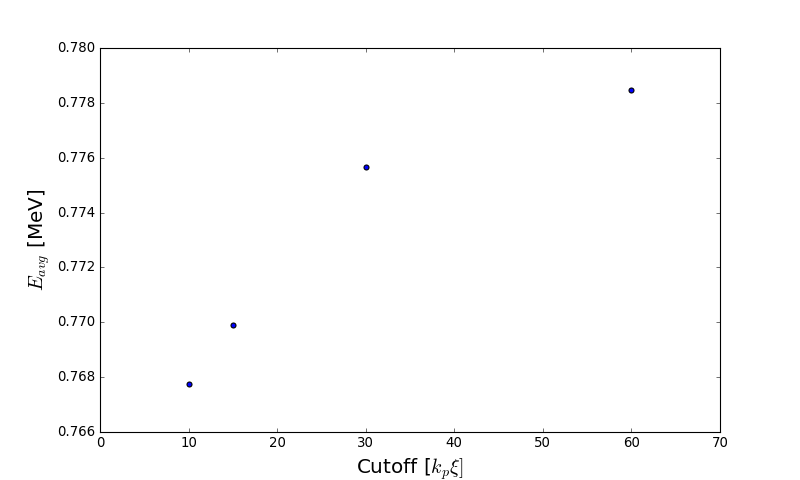

In [9]:
cutoff = [60, 30, 15, 10]
names = [Nsixty, Nthirty, Nfifteen, Nten]

plt.close()
plt.figure(figsize=(10,6))
plt.scatter(cutoff, [1e-6 * diag.energy_mean_eV(x, False)[0] for x in names])
plt.xlabel(r'Cutoff [$k_p\xi]$', fontsize = 18)
plt.ylabel(r'$E_{avg}$ [MeV]', fontsize = 18)
plt.show()

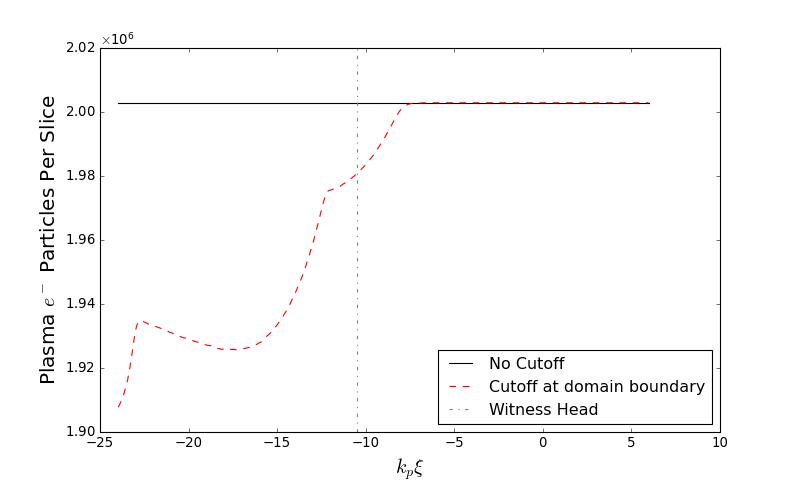

In [111]:
plt.close()
plt.figure(figsize = (10, 6))
plt.plot(data.info.z, noneEInsitu['Np'][0], 'k', label = 'No Cutoff')
plt.plot(data.info.z, data.electronInsitu['Np'][0], 'r--', label = 'Cutoff at domain boundary')
plt.vlines(-10.5, 1.9e6, 2.02e6, color = 'gray', ls = '-.', label='Witness Head')
plt.legend(loc = 'best')
ax = plt.gca()
ax.ticklabel_format(axis = 'y', style = 'sci', useMathText=True, useOffset = False, scilimits = (0,0))
plt.xlabel(r'$k_p\xi$', fontsize = 18)
plt.ylabel('Plasma $e^-$ Particles Per Slice', fontsize = 18)
plt.show()

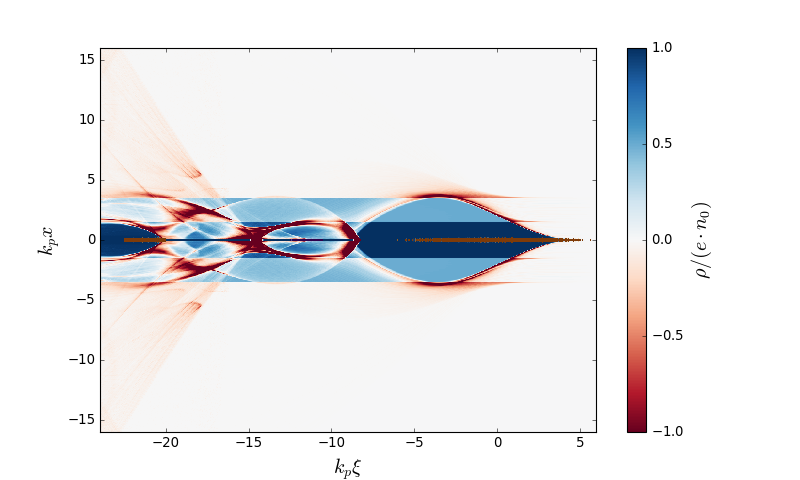

In [9]:
plt.close()
plt.figure(figsize = (10, 6))
ax = plt.axes()
# im = plt.pcolormesh(data.info.z, data.info.x, data.rho.T, cmap = 'Blues_r', vmin = -5, vmax = 0)
im = plt.pcolormesh(data.info.z, data.info.x, data.rho.T, cmap = 'RdBu', vmin = -1, vmax = 1)

plt.pcolormesh(data.info.z, data.info.x, data.jz_beam.T * IA, cmap = 'PuOrT', vmin = -1e14, vmax = 1e14)
# plt.plot(data.info.z, data.profile / max(data.profile) - 6, 'r', alpha = .5)

# plt.xlim(-15, 6)
plt.xlim(data.info.zmin, data.info.zmax)
plt.ylim(data.info.xmin, data.info.xmax)
# plt.ylim(-10, 10)
plt.ylabel(r'$k_px$', fontsize = 18)
plt.xlabel(r'$k_p\xi$', fontsize = 18)

cb2 = plt.colorbar(im)
cb2.formatter.set_useMathText(True)
cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$\rho/(e\cdot n_0)$', fontsize = 18)
# plt.savefig('images/basic.png', dpi = 300, bbox_inches = 'tight')
plt.show()

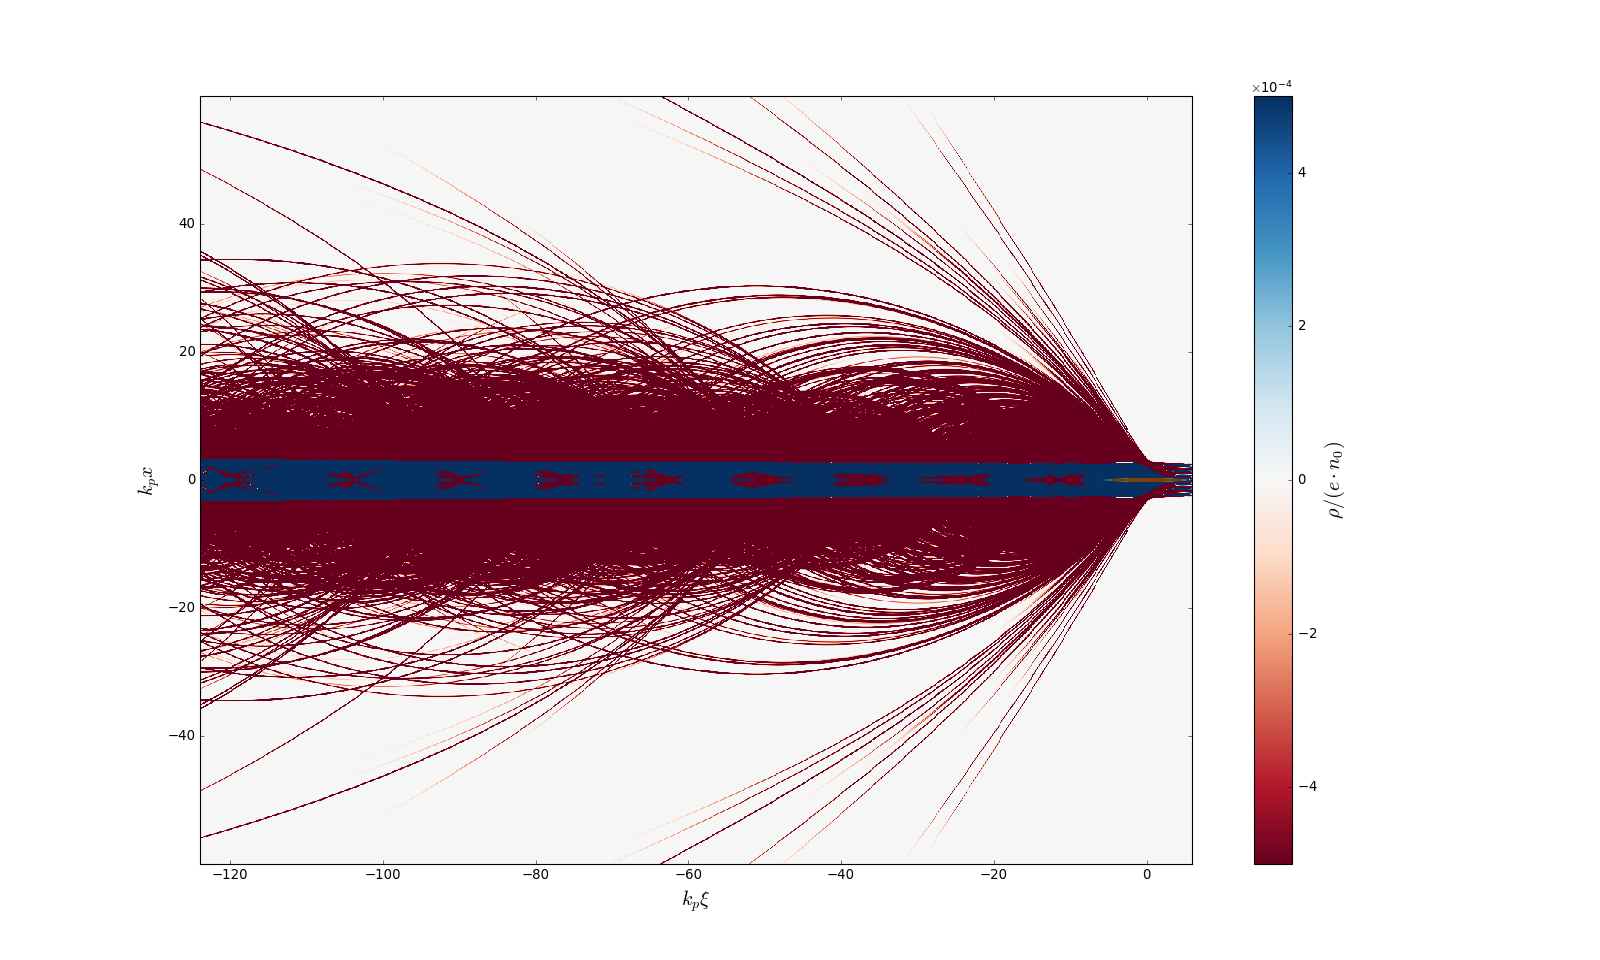

In [25]:
plt.close()
plt.figure(figsize = (20, 12))
ax = plt.axes()
# im = plt.pcolormesh(data.info.z, data.info.x, data.rho.T, cmap = 'Blues_r', vmin = -5, vmax = 0)
im = plt.pcolormesh(data.info.z, data.info.x, data.rho.T, cmap = 'RdBu', vmin = -.0005, vmax = .0005)

plt.pcolormesh(data.info.z, data.info.x, data.jz_beam.T * IA, cmap = 'PuOrT', vmin = -1e14, vmax = 1e14)
# plt.plot(data.info.z, data.profile / max(data.profile) - 6, 'r', alpha = .5)

# plt.xlim(-15, 6)
plt.xlim(data.info.zmin, data.info.zmax)
plt.ylim(data.info.xmin, data.info.xmax)
# plt.ylim(-10, 10)
plt.ylabel(r'$k_px$', fontsize = 18)
plt.xlabel(r'$k_p\xi$', fontsize = 18)

# ax2 = plt.twinx()
# ax2.plot(data.info.z, data.Ez, color = 'black')
# ax2.set_ylim(-.8, .8)
# ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1) 

# divider2 = make_axes_locatable(ax)
# cax2 = divider2.append_axes("right", size = "4%", pad = .8)
# divider3 = make_axes_locatable(ax2)
# cax3 = divider3.append_axes("right", size = "4%", pad = .8)
# cax3.remove()


cb2 = plt.colorbar(im)
cb2.formatter.set_useMathText(True)
cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$\rho/(e\cdot n_0)$', fontsize = 18)
# plt.savefig('images/basic.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [191]:
60*data.kp_inv # = 1mm

0.0010082783043091315

In [289]:
1/(data.kBeta(data.driveInsitu) * constants.c) / 30

2.642422388241317e-13

In [298]:
119.0147596 * data.kp_inv / constants.c / (1/(data.kBeta(data.driveInsitu) * constants.c) / 30)

25.2468414341967

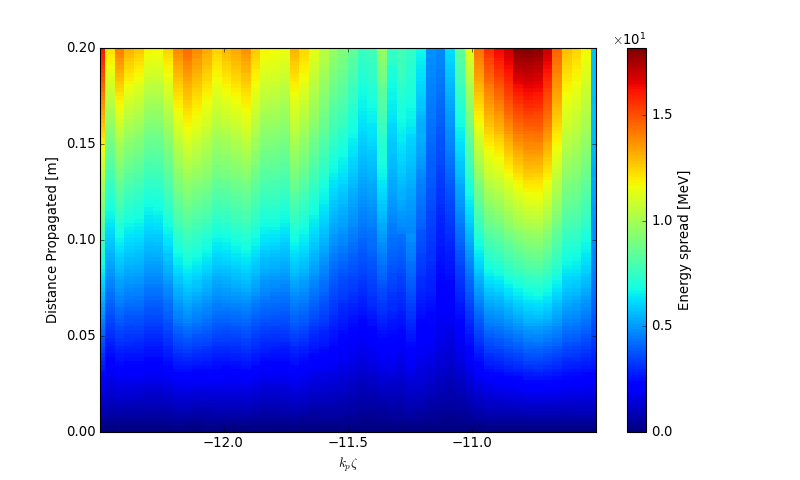

In [33]:
zAx = diag.z_axis(data.witnessInsitu)
beam = zAx[(data.witnessInsitu['sum(w)']!=0)[0]]

plt.close()
plt.figure(figsize=(10, 6))
img = plt.pcolormesh(diag.z_axis(data.witnessInsitu), data.witnessInsitu["time"] * data.kp_inv, diag.energy_spread_eV(data.witnessInsitu, per_slice = True) / 1e6)

plt.ylim(0, .2)
plt.xlim(min(beam), max(beam))
plt.ylabel('Distance Propagated [m]')
plt.xlabel('$k_p\zeta$')
cb2 = plt.colorbar(img)
cb2.formatter.set_useMathText(True)
cb2.formatter.set_powerlimits((0, 0))
cb2.set_label('Energy spread [MeV]')
plt.show()

In [226]:
diag.emittance_x(data.witnessInsitu)[0] * data.kp_inv
data.emittance(.029, 0.9160443304556959, n)

4.4642001835553367e-07

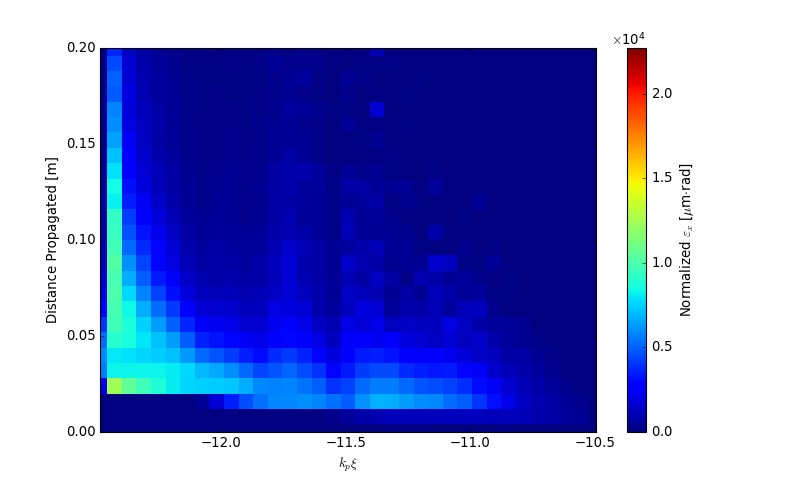

In [12]:
zAx = diag.z_axis(data.witnessInsitu)
beam = zAx[(data.witnessInsitu['sum(w)']!=0)[0]]

plt.close()
plt.figure(figsize=(10, 6))
img = plt.pcolormesh(diag.z_axis(data.witnessInsitu), data.witnessInsitu["time"] * data.kp_inv, diag.emittance_x(data.witnessInsitu) * data.kp_inv * 1e6)

plt.ylim(0, .2)
# plt.xlim(-13, -10)
plt.xlim(min(beam), max(beam))
plt.ylabel('Distance Propagated [m]')
plt.xlabel(r'$k_p\xi$')
cb2 = plt.colorbar(img)
cb2.formatter.set_useMathText(True)
cb2.formatter.set_powerlimits((0, 0))
cb2.set_label('Normalized $\\varepsilon_x$ [$\mu$m$\cdot$rad]')
plt.show()

In [228]:
.029 * data.kp_inv

4.873345137494136e-07

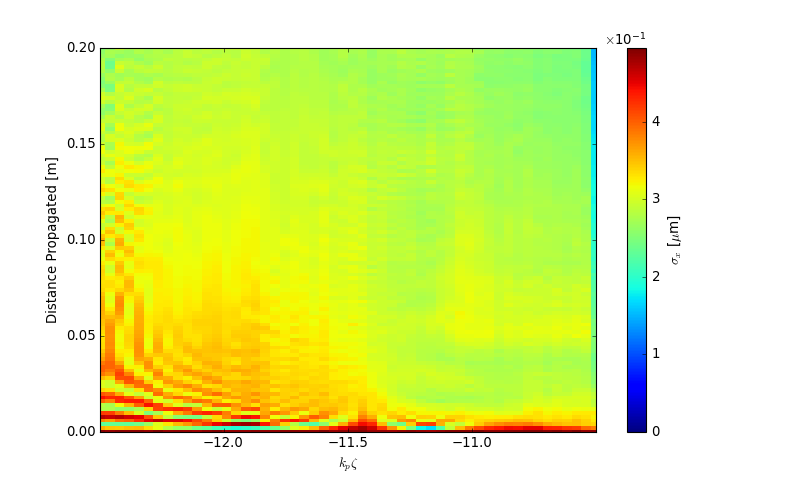

In [259]:
zAx = diag.z_axis(data.witnessInsitu)
beam = zAx[(data.witnessInsitu['sum(w)']!=0)[0]]

plt.close()
plt.figure(figsize=(10, 6))
img = plt.pcolormesh(diag.z_axis(data.witnessInsitu), data.witnessInsitu["time"] * data.kp_inv, diag.position_std(data.witnessInsitu) * data.kp_inv * 1e6)

plt.ylim(0, .2)
# plt.xlim(-13, -10)
plt.xlim(min(beam), max(beam))
plt.ylabel('Distance Propagated [m]')
plt.xlabel('$k_p\zeta$')
cb2 = plt.colorbar(img)
cb2.formatter.set_useMathText(True)
cb2.formatter.set_powerlimits((0, 0))
cb2.set_label('$\sigma_x$ [$\mu$m]')
plt.show()

In [230]:
.2/constants.c * (data.kBeta(data.witnessInsitu) * constants.c) / 100

1.8817882617498818

In [231]:
(data.kBeta(data.witnessInsitu) * constants.c) * .2 / constants.c / 100

1.8817882617498818

In [232]:
188 * data.kp_inv

0.003159272020168612

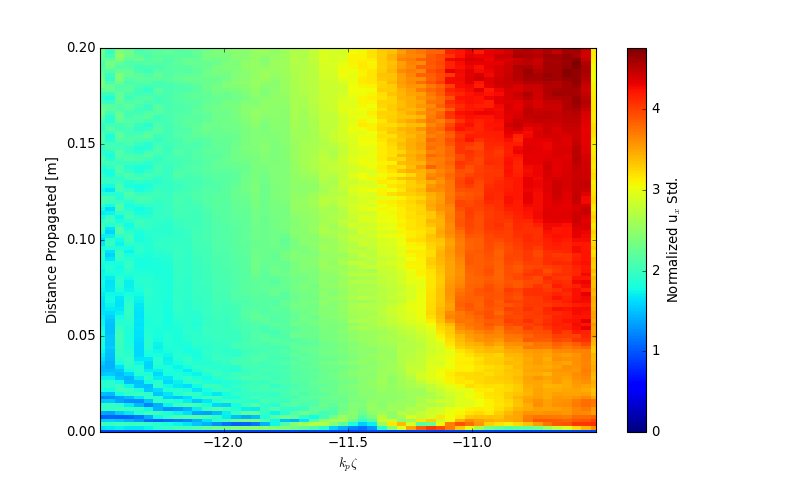

In [260]:
zAx = diag.z_axis(data.witnessInsitu)
beam = zAx[(data.witnessInsitu['sum(w)']!=0)[0]]

plt.close()
plt.figure(figsize=(10, 6))
img = plt.pcolormesh(diag.z_axis(data.witnessInsitu), data.witnessInsitu["time"] * data.kp_inv, diag.normalized_momentum_std(data.witnessInsitu))

plt.ylim(0, .2)
# plt.xlim(-13, -10)
plt.xlim(min(beam), max(beam))
plt.ylabel('Distance Propagated [m]')
plt.xlabel('$k_p\zeta$')
cb2 = plt.colorbar(img)
cb2.formatter.set_useMathText(True)
cb2.formatter.set_powerlimits((0, 0))
cb2.set_label('Normalized u$_x$ Std.')
plt.show()

In [234]:
data.kp / np.sqrt(2*1e4)

420.7807178818874

In [235]:
data.driveInsitu['average']['[ga]'][0]

10000.001292854788

In [236]:
data.epsMatched(data.driveInsitu, True, .05)

2.9706686349498904e-06

In [237]:
1e-5 / 1.6e-6

6.250000000000001

In [238]:
data.ux(data.epsMatched(data.driveInsitu, True, .05), .05, True)

3.535534134479327

In [239]:
data.skinDepth(4e16)

2.6570466307910177e-05

In [ ]:
plt.close()
plt.figure(figsize=(10, 18))

plt.subplot(3, 1, 1)
plt.plot(data.witnessInsitu['time'] / data.kBeta(data.witnessInsitu), diag.emittance_x(data.witnessInsitu['average']))
plt.ylabel('$\\varepsilon_x$')

plt.subplot(3, 1, 2)
plt.plot(data.witnessInsitu['time'] / data.kBeta(data.witnessInsitu), diag.normalized_momentum_std(data.witnessInsitu['average']))
plt.ylabel('$\sigma_{u_x}$')

plt.subplot(3, 1, 3)
plt.plot(data.witnessInsitu['time'] / data.kBeta(data.witnessInsitu), diag.position_std(data.witnessInsitu['average']) * data.kp_inv * 1e6)

plt.ylabel('$\sigma_x$ [$\mu m$]')

plt.xlabel('Distance Propagated [m]')
plt.show()

In [241]:
.2e6 / ((data.kp * constants.c)**-1 * 40 * constants.c * 1e6)

297.5368990068262

In [242]:
.002 / data.kp_inv

119.01475960273046

In [243]:
# skindepth / c

In [ ]:
zd, uzd = data.ts.get_particle(var_list = ['z', 'uz'], species = 'drive', iteration = 100)
zw, uzw = data.ts.get_particle(var_list = ['z', 'uz'], species = 'witness', iteration = 100)

plt.figure(figsize = (10, 6))
plt.scatter(zd, uzd, s = 0.001, edgecolor = 'darkred')
plt.scatter(zw, uzw, s = 0.001, edgecolor = 'blue')
plt.xlabel('$k_p\zeta$')
plt.ylabel('$u_z/(m_e c)$')
plt.ylim(0, 1.05e4)
plt.show()

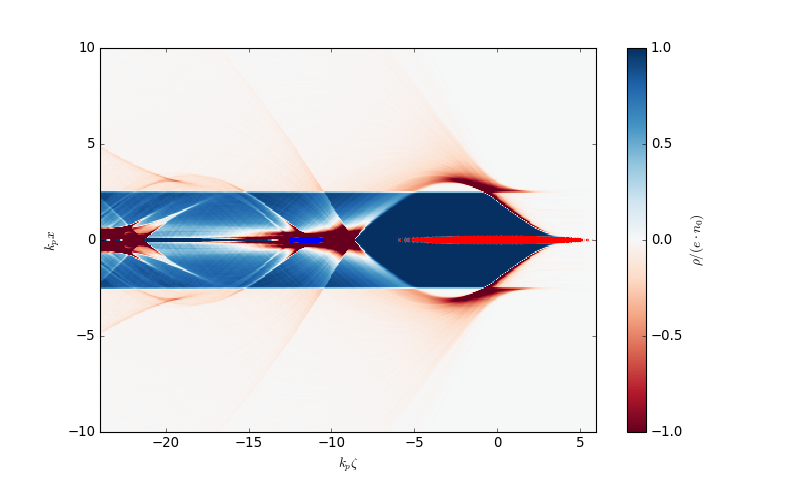

In [145]:
plt.close()
plt.figure(figsize = (10, 6))
ax = plt.axes()
# im = plt.pcolormesh(data.info.z, data.info.x, data.rho.T, cmap = 'Blues_r', vmin = -5, vmax = 0)
im = plt.pcolormesh(data.info.z, data.info.x, data.rho.T, cmap = 'RdBu', vmin = -1, vmax = 1)

plt.pcolormesh(data.info.z, data.info.x, data.jz_beam.T * IA, cmap = 'bwr_rT', vmin = -1e14, vmax = 1e14)
# plt.plot(data.info.z, data.profile / max(data.profile) - 6, 'r', alpha = .5)

# plt.xlim(-15, 6)
plt.xlim(data.info.zmin, data.info.zmax)
# plt.ylim(info.xmin, info.xmax)
plt.ylim(-10, 10)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')

# ax2 = plt.twinx()
# ax2.plot(data.info.z, data.Ez, color = 'black')
# ax2.set_ylim(-.8, .8)
# ax2.set_ylabel(r'$E_z/E_0$',  labelpad = 1) 

# divider2 = make_axes_locatable(ax)
# cax2 = divider2.append_axes("right", size = "4%", pad = .8)
# divider3 = make_axes_locatable(ax2)
# cax3 = divider3.append_axes("right", size = "4%", pad = .8)
# cax3.remove()


cb2 = plt.colorbar(im)
# cb2.formatter.set_useMathText(True)
# cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$\rho/(e\cdot n_0)$')
# plt.savefig('images/basic.png', dpi = 300, bbox_inches = 'tight')
plt.show()

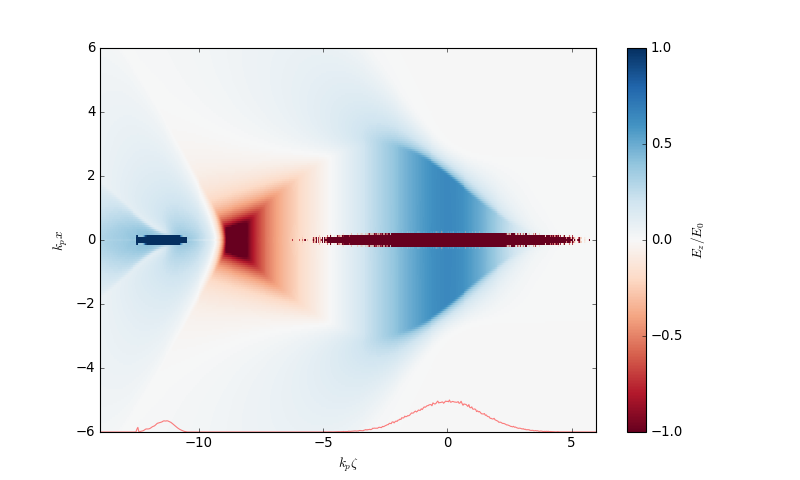

In [246]:
Ez = data.ts.get_field(field = 'Ez', iteration = data.iteration)[0]

plt.close()
plt.figure(figsize = (10, 6))
ax = plt.axes()
im = plt.pcolormesh(data.info.z, data.info.x, Ez.T, cmap = 'RdBu', vmin = -1, vmax = 1)

plt.pcolormesh(data.info.z, data.info.x, data.jz_beam.T * IA, cmap = 'RdBuT', vmin = -1e14, vmax = 1e14)
plt.plot(data.info.z, data.profile / max(data.profile) - 6, 'r', alpha = .5)

# plt.xlim(-15, 6)
plt.xlim(data.info.zmin, data.info.zmax)
# plt.ylim(info.xmin, info.xmax)
plt.ylim(-6, 6)
plt.ylabel('$k_px$')
plt.xlabel('$k_p\zeta$')

cb2 = plt.colorbar(im)
# cb2.formatter.set_useMathText(True)
# cb2.formatter.set_powerlimits((0, 0))
cb2.set_label(r'$E_z/E_0$')
# plt.savefig('images/basic.png', dpi = 300, bbox_inches = 'tight')
plt.show()

-10.0986328125 -4.7373046875 -10.3037109375
[-23.98535156 -23.95605469 -23.92675781 -22.75488281 -22.72558594
 -18.38964844 -18.36035156 -18.33105469 -11.47558594  -4.76660156
  -4.73730469  -4.70800781]


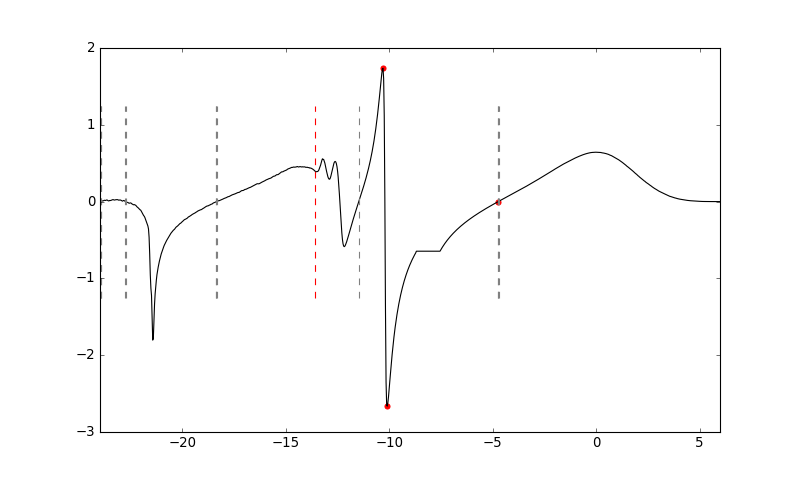

In [29]:
m = (data.info.z > -12) & (data.info.z < -9)
# m = (data.info.z > -23) & (data.info.z < -20)
recoveryPlacement = np.argmin(data.Ez[m])
wp = np.argmax(data.Ez[m])
minLoc = data.info.z[m][recoveryPlacement]
maxLoc = data.info.z[m][wp]
# mZero = (data.info.z > minLoc) & (data.info.z < 0)
mZero = (data.info.z > minLoc) & (data.info.z < 0)
zeroIdx = np.argmin(abs(data.Ez[mZero]))
zeroLoc = data.info.z[mZero][zeroIdx]
print(minLoc, zeroLoc, maxLoc)
# print(zeroLoc, minLoc)
print(data.info.z[(abs(data.Ez) < 5e-3) & (data.info.z < 0.)])

plt.close()
plt.figure(figsize = (10, 6))
plt.plot(data.info.z, data.Ez, color = 'k')
plt.scatter([minLoc, zeroLoc, maxLoc], [data.Ez[m][recoveryPlacement], data.Ez[mZero][zeroIdx], data.Ez[m][wp]], color = 'r')
# plt.hlines(0, data.info.z[0], data.info.z[-1], color = 'gray', linestyle = '-')
# plt.vlines([-13.25, -17.], -1, 1, color = 'gray', linestyle = '--')
plt.vlines(data.info.z[(abs(data.Ez) < 5e-3) & (data.info.z < 0.)], -1.25, 1.25, color = 'gray', linestyle = '--')
# plt.xticks(np.arange(data.info.zmin, data.info.zmax))
plt.vlines(-13.6, -1.25, 1.25, color = 'r', linestyle = '--')
plt.xlim(data.info.zmin, data.info.zmax)
# plt.ylim(-1.25, 1.25)
plt.show()